In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import string,cv2

In [2]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

TỔNG QUÁT MÔ HÌNH SẼ XÂY DỰNG
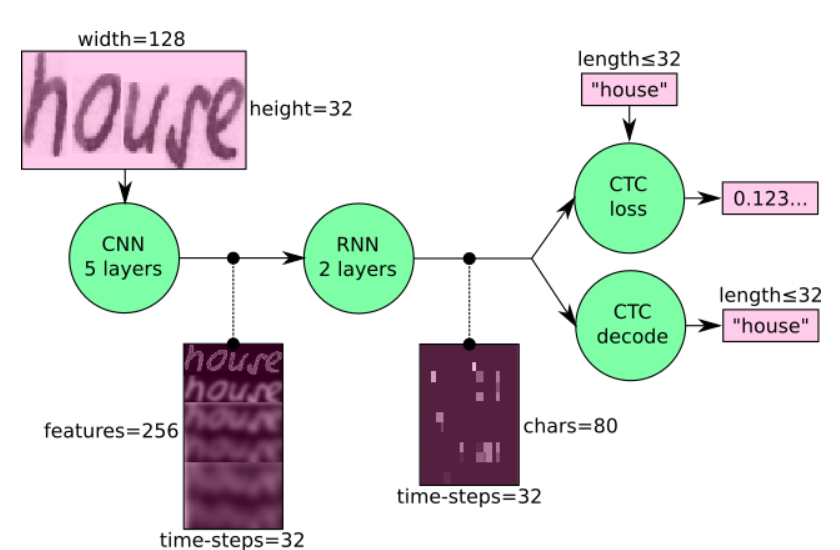

[Tham Khao bai viet](https://towardsdatascience.com/build-a-handwritten-text-recognition-system-using-tensorflow-2326a3487cd5)

[Tham Khao Code](https://github.com/TheAILearner/A-CRNN-model-for-Text-Recognition-in-Keras/blob/master/CRNN%20Model.ipynb)

In [3]:
fh = open('words.txt','r')
connets = fh.readlines()
lines = [line.strip() for line in connets]
lines = lines[18:] 

In [4]:
lines[:4]

['a01-000u-00-00 ok 154 408 768 27 51 AT A',
 'a01-000u-00-01 ok 154 507 766 213 48 NN MOVE',
 'a01-000u-00-02 ok 154 796 764 70 50 TO to',
 'a01-000u-00-03 ok 154 919 757 166 78 VB stop']

In [5]:
def encode_to_labels(txt):
    # encoding each output word into digits
    dig_lst = []
    for index, char in enumerate(txt):
        try:
            dig_lst.append(char_list.index(char))
        except:
            print(char)
        
    return dig_lst
char_list = "!\"#&'()*+,-./0123456789:;?ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz"

In [6]:
images = []
labels = []

RECORDS_COUNT = 10000

In [7]:
train_images = []
train_labels = []
train_input_length = []
train_label_length = []
train_original_text = []

valid_images = []
valid_labels = []
valid_input_length = []
valid_label_length = []
valid_original_text = []

inputs_length = []
labels_length = []

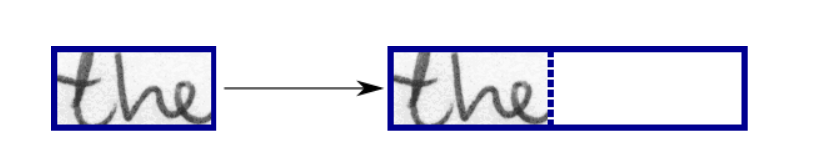

Đầu vào mạng CNN: Nó là bức ảnh xám có kích thước là 128 * 32. Thông thường, bức ảnh trong tâp dataset nó thực sự không cùng size (Không bị biến dạng), do đó ta cần resize nó lại. Ta sẽ sao chép hình ảnh vào một hình ảnh đích (màu trắng) có kích thước 128 × 32

In [8]:

def process_image(img):
    """
    Converts image to shape (32, 128, 1) & normalize
    """
    w, h = img.shape
    new_w = 32
    new_h = int(h * (new_w / w))
    img = cv2.resize(img, (new_h, new_w))
    w, h = img.shape
    img = img.astype('float32')
    
    # Converts each to (32, 128, 1)
    if w < 32:
        add_zeros = np.full((32-w, h), 255)
        img = np.concatenate((img, add_zeros))
        w, h = img.shape
    
    if h < 128:
        add_zeros = np.full((w, 128-h), 255)
        img = np.concatenate((img, add_zeros), axis=1)
        w, h = img.shape
        
    if h > 128 or w > 32:
        dim = (128,32)
        img = cv2.resize(img, dim)
    
    img = cv2.subtract(255, img)
    
    img = np.expand_dims(img, axis=2)
    
 
    img = img / 255
    
    return img

Trong file words.txt nó chứa các thông tin bức ảnh đó

'a01-000u-00-00 ok 154 408 768 27 51 AT A'

In [10]:
"""
Ta install dataset IAM, giải nén các thư mục assic.tgz,words.tgz và có file ảnh và .txt format cấu trúc data
"""
max_label_len = 0

for index, line in enumerate(lines):
    splits = line.split(' ')
    status = splits[1]
    
    if status == 'ok':
        word_id = splits[0]
        word = "".join(splits[8:])
        
        splits_id = word_id.split('-')
        filepath = 'C:/Users/nguye/OneDrive/Code/handwritting_text/dataset/{}/{}-{}/{}.png'.format(splits_id[0], 
                                                  splits_id[0], 
                                                  splits_id[1], 
                                                  word_id)
        
        img = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
        try:
            img = process_image(img)
        except:
            continue
        try:
            label = encode_to_labels(word)
        except:
            continue
        if index % 10 == 0:
            valid_images.append(img)
            valid_labels.append(label)
            valid_input_length.append(31)
            valid_label_length.append(len(word))
            valid_original_text.append(word)
        else:
            train_images.append(img)
            train_labels.append(label)
            train_input_length.append(31)
            train_label_length.append(len(word))
            train_original_text.append(word)
        
        if len(word) > max_label_len:
            max_label_len = len(word)
    
    if index >= RECORDS_COUNT:
        break

In [11]:
train_padded_label = pad_sequences(train_labels, 
                             maxlen=max_label_len, 
                             padding='post',
                             value=len(char_list))

valid_padded_label = pad_sequences(valid_labels, 
                             maxlen=max_label_len, 
                             padding='post',
                             value=len(char_list))

In [12]:
train_padded_label.shape,valid_padded_label.shape

((15700, 16), (1752, 16))

In [13]:
train_images = np.array(train_images)
train_input_length = np.array(train_input_length)
train_label_length = np.array(train_label_length)

valid_images = np.array(valid_images)
valid_input_length = np.array(valid_input_length)
valid_label_length = np.array(valid_label_length)

In [14]:
train_images.shape,valid_images.shape

((15700, 32, 128, 1), (1752, 32, 128, 1))

In [15]:
with open('Input_Output/train_images.npy', 'wb') as f:
    np.save(f, train_images)
with open('Input_Output/train_input_length.npy', 'wb') as f:
    np.save(f, train_input_length)    
with open('Input_Output/train_label_length.npy', 'wb') as f:
    np.save(f, train_label_length)

with open('Input_Output/train_padded_label.npy', 'wb') as f:
    np.save(f, train_padded_label)    
with open('Input_Output/valid_padded_label.npy', 'wb') as f:
    np.save(f, valid_padded_label)    

    
with open('Input_Output/valid_images.npy', 'wb') as f:
    np.save(f, valid_images)
with open('Input_Output/valid_input_length.npy', 'wb') as f:
    np.save(f, valid_input_length)
with open('Input_Output/valid_label_length.npy', 'wb') as f:
    np.save(f, valid_label_length)

Kiến truc mạng sẽ tham khảo từ [Paper](https://arxiv.org/pdf/1507.05717.pdf) này

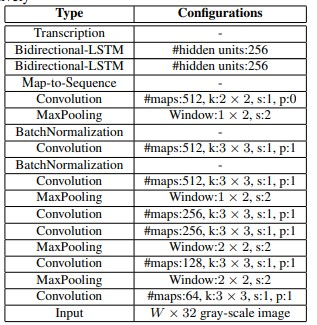

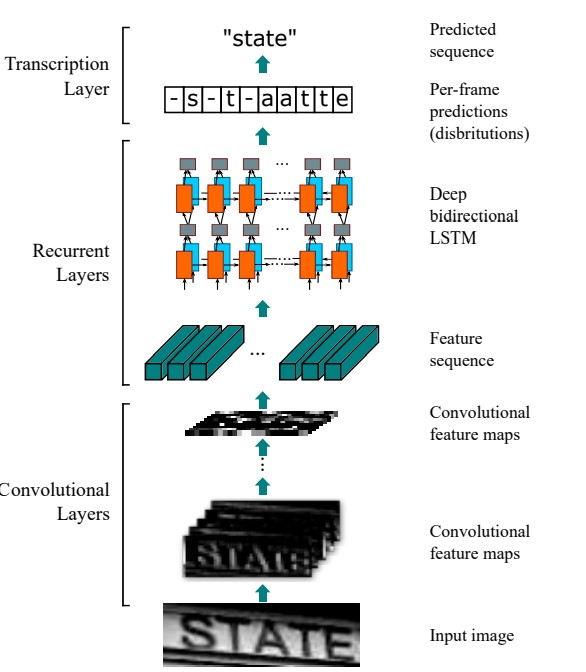

In [17]:
from tensorflow.keras.layers import Input,LSTM,Dense,BatchNormalization,Conv2D,Dropout,MaxPooling2D,Bidirectional,Reshape,Lambda
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint
import tensorflow.keras.backend as K
from tensorflow.keras.layers import MaxPool2D

In [18]:
# input with shape of height=32 and width=128 
inputs = Input(shape=(32,128,1))
 
# convolution layer with kernel size (3,3)
conv_1 = Conv2D(64, (3,3), activation = 'relu', padding='same')(inputs)
# poolig layer with kernel size (2,2)
pool_1 = MaxPool2D(pool_size=(2, 2), strides=2)(conv_1)
 
conv_2 = Conv2D(128, (3,3), activation = 'relu', padding='same')(pool_1)
pool_2 = MaxPool2D(pool_size=(2, 2), strides=2)(conv_2)
 
conv_3 = Conv2D(256, (3,3), activation = 'relu', padding='same')(pool_2)
 
conv_4 = Conv2D(256, (3,3), activation = 'relu', padding='same')(conv_3)
# poolig layer with kernel size (2,1)
pool_4 = MaxPool2D(pool_size=(2, 1))(conv_4)
 
conv_5 = Conv2D(512, (3,3), activation = 'relu', padding='same')(pool_4)
# Batch normalization layer
batch_norm_5 = BatchNormalization()(conv_5)
 
conv_6 = Conv2D(512, (3,3), activation = 'relu', padding='same')(batch_norm_5)
batch_norm_6 = BatchNormalization()(conv_6)
pool_6 = MaxPool2D(pool_size=(2, 1))(batch_norm_6)
 
conv_7 = Conv2D(512, (2,2), activation = 'relu')(pool_6)
 
squeezed = Lambda(lambda x: K.squeeze(x, 1))(conv_7)
 
# bidirectional LSTM layers with units=128
blstm_1 = Bidirectional(LSTM(256, return_sequences=True, dropout = 0.2))(squeezed)
blstm_2 = Bidirectional(LSTM(256, return_sequences=True, dropout = 0.2))(blstm_1)
 
outputs = Dense(len(char_list)+1, activation = 'softmax')(blstm_2)

# model to be used at test time
model = Model(inputs, outputs)

In [19]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 128, 1)]      0         
                                                                 
 conv2d (Conv2D)             (None, 32, 128, 64)       640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 64, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 64, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 32, 128)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 32, 256)        295168

In [27]:
model.load_weights('best_model.hdf5')

In [28]:
valid_images.shape

(876, 32, 128, 1)

In [29]:
prediction = model.predict(valid_images)

In [30]:
decoded = K.ctc_decode(prediction, 
                       input_length=np.ones(prediction.shape[0]) * prediction.shape[1],
                       greedy=True)[0][0]
out = K.get_value(decoded)

In [37]:
i = 0
for x in out:
    print("original_text =  ", valid_original_text[i])
    print("predicted text = ", end = '')
    for p in x:  
        if int(p) != -1:
            print(char_list[int(p)], end = '')       
    print('\n')
    i+=1

original_text =   A
predicted text = A

original_text =   Labour
predicted text = Labour

original_text =   of
predicted text = of

original_text =   down
predicted text = down

original_text =   Exchange
predicted text = Crckauge

original_text =   any
predicted text = ay

original_text =   a
predicted text = a

original_text =   has
predicted text = ha

original_text =   is
predicted text = is

original_text =   for
predicted text = tor

original_text =   support
predicted text = support

original_text =   to
predicted text = to

original_text =   will
predicted text = wit

original_text =   which
predicted text = whored

original_text =   now
predicted text = now

original_text =   of
predicted text = of

original_text =   take
predicted text = take

original_text =   Left-wing
predicted text = rett-wing

original_text =   likely
predicted text = likely

original_text =   Government
predicted text = Government

original_text =   should
predicted text = schauld

original_text =   the

predicted text = caiting

original_text =   reminded
predicted text = reminded

original_text =   because
predicted text = Gecouse

original_text =   in
predicted text = in

original_text =   expenditure
predicted text = ccpanditue

original_text =   cent.
predicted text = cent

original_text =   unsmiling
predicted text = unomting

original_text =   it
predicted text = it

original_text =   action
predicted text = action

original_text =   risen
predicted text = risen

original_text =   eight
predicted text = cight

original_text =   worse
predicted text = wore

original_text =   to
predicted text = to

original_text =   of
predicted text = of

original_text =   to
predicted text = to

original_text =   directly
predicted text = airectly

original_text =   instead
predicted text = instedd

original_text =   should
predicted text = should

original_text =   #
predicted text = to

original_text =   on
predicted text = on

original_text =   .
predicted text = .

original_text =   cost
pr

predicted text = were

original_text =   federal
predicted text = federal

original_text =   cent
predicted text = cent

original_text =   C.C.F.
predicted text = Cc7.

original_text =   Mr.
predicted text = Mr.

original_text =   an
predicted text = al

original_text =   ,
predicted text = ,

original_text =   far
predicted text = for

original_text =   Canada
predicted text = Canado

original_text =   national
predicted text = notienal

original_text =   difficult
predicted text = diffieunlt

original_text =   of
predicted text = of

original_text =   that
predicted text = that

original_text =   .
predicted text = .

original_text =   the
predicted text = the

original_text =   or
predicted text = or

original_text =   father
predicted text = fatker

original_text =   the
predicted text = the

original_text =   in
predicted text = in

original_text =   regard
predicted text = regarrd

original_text =   egghead
predicted text = eggshead

original_text =   now
predicted text = now

or

In [38]:
import Levenshtein as lv

total_jaro = 0
total_rati = 0
# see the results
for i, x in enumerate(out):
    letters=''
    for p in x:
        if int(p) != -1:
            letters+=char_list[int(p)]
    total_jaro+=lv.jaro(letters, valid_original_text[i])
    total_rati+=lv.ratio(letters, valid_original_text[i])

print('jaro :', total_jaro/len(out))
print('ratio:', total_rati/len(out))

jaro : 0.907258677606851
ratio: 0.8745419703261236


In [53]:
valid_images.shape

(876, 32, 128, 1)

In [39]:
#test

In [46]:
import cv2

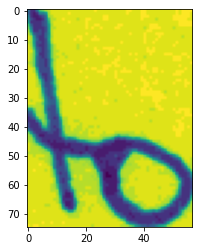

In [70]:
img = cv2.imread('C:/Users/nguye/OneDrive/Code/handwritting_text/dataset/a04/a04-000/a04-000-05-00.png',cv2.IMREAD_GRAYSCALE)
plt.imshow(img)

In [71]:
img = process_image(img)

In [72]:
img.shape

(32, 128, 1)

In [73]:
prediction = model.predict(img.reshape(1,32,128,1))

In [74]:
decoded = K.ctc_decode(prediction, 
                       input_length=np.ones(prediction.shape[0]) * prediction.shape[1],
                       greedy=True)[0][0]
out = K.get_value(decoded)

In [75]:
i = 0
for x in out:
    print("predicted text = ", end = '')
    for p in x:  
        if int(p) != -1:
            print(char_list[int(p)], end = '')       
    print('\n')
    i+=1

predicted text = to

